In [148]:
def Laplace_Jacobi_slow(Phi):
    # Don't use, very slow AND inefficient
    Phi_new = Phi.copy()
    Nx, Ny = Phi.shape
    for xi in range(1, Nx-1):
        for yj in range(1, Ny-1):
            Phi_new[xi, yj] = 0.25*(Phi[xi+1, yj] + Phi[xi-1, yj]
                                  + Phi[xi, yj+1] + Phi[xi, yj-1])
    Phi[:, :] = Phi_new
    return Phi

In [149]:
def Laplace_Jacobi(Phi):
    """One update in the Jacobi algorithm"""
    Phi[1:-1, 1:-1] = 0.25*(Phi[2:, 1:-1] + Phi[0:-2, 1:-1] + Phi[1:-1, 2:] + Phi[1:-1, 0:-2])
    return Phi

In [150]:
def Laplace_Gauss_Seidel(Phi):
    """One update in the Gauss-Seidel algorithm"""
    Nx, Ny = Phi.shape
    for xi in range(1, Nx-1):
        for yj in range(1, Ny-1):
            Phi[xi, yj] = 0.25*(Phi[xi+1, yj] + Phi[xi-1, yj]
                                + Phi[xi, yj+1] + Phi[xi, yj-1])
    return Phi

In [151]:
def Laplace_Gauss_Seidel_odd_even(Phi):
    """One update in the Gauss-Seidel algorithm on odd or even fields"""
    # odd update (uses old even)
    Phi[1:-2:2, 1:-2:2] = 0.25*(Phi[2::2, 1:-2:2] + Phi[0:-2:2, 1:-2:2] + Phi[1:-2:2, 2::2] + Phi[1:-2:2, 0:-2:2])
    Phi[2:-1:2, 2:-1:2] = 0.25*(Phi[3::2, 2:-1:2] + Phi[1:-2:2, 2:-1:2] + Phi[2:-1:2, 3::2] + Phi[2:-1:2, 1:-2:2])
    
    # even update (uses new odd)
    Phi[1:-2:2, 2:-1:2] = 0.25*(Phi[2::2, 2:-1:2] + Phi[0:-2:2, 2:-1:2] + Phi[1:-2:2, 3::2] + Phi[1:-2:2, 1:-1:2])
    Phi[2:-1:2, 1:-2:2] = 0.25*(Phi[3::2, 1:-2:2] + Phi[1:-2:2, 1:-2:2] + Phi[2:-1:2, 2::2] + Phi[2:-1:2, 0:-2:2])
    return Phi

In [152]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [153]:
# for interactive work
%matplotlib widget

In [154]:
%matplotlib inline

In [155]:
def plot_contour(Phi, filename=None, zlabel=r"potential $\Phi$ (V)",
                 cmap=plt.cm.coolwarm):
    """Plot Phi as a contour plot.
    
    Arguments
    ---------
    Phi : 2D array
          potential on lattice
    filename : string or None, optional (default: None)
          If `None` then show the figure and return the axes object.
          If a string is given (like "contour.png") it will only plot 
          to the filename and close the figure but return the filename.
    cmap : colormap
          pick one from matplotlib.cm          
    """
    fig = plt.figure(figsize=(5,4))
    ax = fig.add_subplot(111)

    x = np.arange(Phi.shape[0])
    y = np.arange(Phi.shape[1])
    X, Y = np.meshgrid(x, y)
    Z = Phi[X, Y]
    cset = ax.contourf(X, Y, Z, 20, cmap=cmap)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_aspect(1)

    cb = fig.colorbar(cset, shrink=0.5, aspect=5)
    cb.set_label(zlabel)
    
    if filename:
        fig.savefig(filename)
        plt.close(fig)
        return filename
    else:
        return ax
    

def plot_surf(Phi, filename=None, offset=-20, zlabel=r'potential $\Phi$ (V)',
             elevation=40, azimuth=-65, cmap=plt.cm.coolwarm):
    """Plot Phi as a 3D plot with contour plot underneath.
    
    Arguments
    ---------
    Phi : 2D array
          potential on lattice
    filename : string or None, optional (default: None)
          If `None` then show the figure and return the axes object.
          If a string is given (like "contour.png") it will only plot 
          to the filename and close the figure but return the filename.
    offset : float, optional (default: 20)
          position the 2D contour plot by offset along the Z direction
          under the minimum Z value
    zlabel : string, optional
          label for the Z axis and color scale bar
    elevation : float, optional
          choose elevation for initial viewpoint
    azimuth : float, optional
          chooze azimuth angle for initial viewpoint
    cmap : colormap
          pick one from matplotlib.cm
    """
     
    x = np.arange(Phi.shape[0])
    y = np.arange(Phi.shape[1])
    X, Y = np.meshgrid(x, y)
    Z = Phi[X, Y]
        
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2, linewidth=0.5, color="gray")
    surf = ax.plot_surface(X, Y, Z, cmap=cmap, alpha=0.6)
    cset = ax.contourf(X, Y, Z, 20, zdir='z', offset=offset+Z.min(), cmap=cmap)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel(zlabel)
    ax.set_zlim(offset + Z.min(), Z.max())
    
    ax.view_init(elev=elevation, azim=azimuth)

    cb = fig.colorbar(surf, shrink=0.5, aspect=5)
    cb.set_label(zlabel)
    
    if filename:
        fig.savefig(filename)
        plt.close(fig)
        return filename
    else:
        return ax

In [156]:
def plot_surf2(Phi, x, y, filename=None, offset=-20, zlabel=r'potential $\Phi$ (V)',
             elevation=40, azimuth=-65, cmap=plt.cm.coolwarm):
    """Plot Phi as a 3D plot with contour plot underneath.
    
    Arguments
    ---------
    Phi : 2D array
          potential on lattice
    filename : string or None, optional (default: None)
          If `None` then show the figure and return the axes object.
          If a string is given (like "contour.png") it will only plot 
          to the filename and close the figure but return the filename.
    offset : float, optional (default: 20)
          position the 2D contour plot by offset along the Z direction
          under the minimum Z value
    zlabel : string, optional
          label for the Z axis and color scale bar
    elevation : float, optional
          choose elevation for initial viewpoint
    azimuth : float, optional
          chooze azimuth angle for initial viewpoint
    cmap : colormap
          pick one from matplotlib.cm
    """
     
    #x = np.arange(Phi.shape[0])
    #y = np.arange(Phi.shape[1])
    X, Y = np.meshgrid(x, y)
    Z = Phi
        
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2, linewidth=0.5, color="gray")
    surf = ax.plot_surface(X, Y, Z, cmap=cmap, alpha=0.6)
    cset = ax.contourf(X, Y, Z, 20, zdir='z', offset=offset+Z.min(), cmap=cmap)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel(zlabel)
    ax.set_zlim(offset + Z.min(), Z.max())
    
    ax.view_init(elev=elevation, azim=azimuth)

    cb = fig.colorbar(surf, shrink=0.5, aspect=5)
    cb.set_label(zlabel)
    
    if filename:
        fig.savefig(filename)
        plt.close(fig)
        return filename
    else:
        return ax

In [157]:
from tqdm import tqdm

In [158]:
#Max_iter=30000
# tol = 1e-3
# Nmax = 100
# Phi = np.zeros((Nmax, Nmax), dtype=np.float64)
# Phi_old = np.zeros_like(Phi)

# initialize boundaries
# everything starts out zero so nothing special for the grounded wires
# Phi[0, :] = 100     # wire at x=0 at 100 V

# for n_iter in tqdm(range(Max_iter)):
#     Phi_old[:, :] = Phi
#     Phi = Laplace_Gauss_Seidel_odd_even(Phi)
#     DeltaPhi = np.linalg.norm(Phi - Phi_old)
#     if DeltaPhi < tol:
#         print("Laplace_Gauss_Seidel_odd_even converged in {0} iterations to {1}".format(n_iter+1, DeltaPhi))
#         break
# else:
#     print("Laplace_Gauss_Seidel_odd_even did NOT converge in {0} iterations, DeltaPhi={1}".format(n_iter+1, DeltaPhi))
    

In [159]:
# Max_iter=10000
# tol = 1e-3
# Nmax = 1000
# omega = 1.99

# Phi = np.zeros((Nmax, Nmax), dtype=np.float64)
# Phi_old = np.zeros_like(Phi)
# residual = np.zeros_like(Phi)

# # initialize boundaries
# # everything starts out zero so nothing special for the grounded wires
# Phi[0, :] = 100     # wire at x=0 at 100 V
# Phi[:,0] = -100
# for n_iter in tqdm(range(Max_iter)):
#     Phi_old[:, :] = Phi
#     Phi = Laplace_Gauss_Seidel_odd_even(Phi)
#     residual[:, :] = Phi - Phi_old
#     DeltaPhi = np.linalg.norm(residual)
#     if DeltaPhi < tol:
#         print("SOR converged in {0} iterations to {1}".format(n_iter+1, DeltaPhi))
#         break
#     # SOR
#     Phi[:, :] = Phi_old + omega*residual  # = omega*Phi + (1-omega)*Phi_old
# else:
#     print("SOR did NOT converge in {0} iterations, DeltaPhi={1}".format(n_iter+1, DeltaPhi))


In [160]:
# plot_surf(Phi);
# plot_contour(Phi);

In [161]:
#full solution starts here

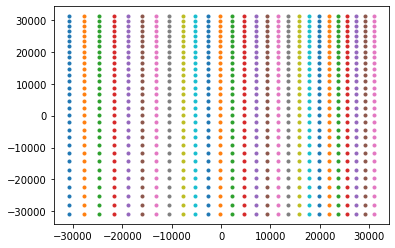

In [10]:
# ##figuring out the mesh dicing 
import numpy as np 
import matplotlib.pyplot as plt 
xnumf = int(1000)
ynumf = xnumf 
r_ebeam = 50 #micrometers - radius of electron beam
r_dtube = 28e3 #micrometers - radius of middle drift tube 
#r_dtube = 10*r_ebeam
t_dtube = 100
px = r_dtube*1.1
py = px 

fregion = 3*r_ebeam
cregion = px-fregion 

cden = 100 #coarse density to be scaled for fine density, micrometers/element 


celem = int(cregion/cden)

xfine = np.linspace(-100, 100, num=xnumf)



def dicefun(x, a, b, c):
    return c + b*x + a*x**2

a = 9.95*10**(-1.5)
b = 2
c = 10

xdice = []
ydice = []

xstart = -px 
ystart = -py
totel = xnumf + celem
ivec = []
xdice.append(xstart)
ydice.append(ystart)
ivec.append(-1)

i = -99
count = 0
while xstart <= px:
    ivec.append(i)
    
    xval = dicefun(i, a, 0, 0.5)

    xstart += xval
    count += 1
    xdice.append(xstart)

    i += 1

m = -99
while ystart <= py: 



    yval = dicefun(m,a, b, c)
    ystart += yval
    ydice.append(ystart)

    m += 1

#print(xstart)

#print(i,m)

xx, yy = np.meshgrid(xdice, ydice)
nxx = -np.flip(xx)
nyy = -np.flip(yy)
newxx = np.concatenate((nxx,xx))
newyyj = np.concatenate((nyy,yy))
#testgrid = ((nxx,xx))
testx = ((nxx,xx))
testy = ((nyy,yy))

plt.figure() 

# plt.plot(testx[1],testy[1], marker='.', ls='none')
# plt.plot(testx[1],testy[0], marker='.', ls='none')
# plt.plot(testx[0],testy[1], marker='.', ls='none')
plt.plot(xx,yy, marker='.', ls='none')
# plt.xlim(28000,29000)
# plt.ylim(28000,29000)
plt.show()





In [163]:
##figuring out the mesh dicing 
# import numpy as np 
# import matplotlib.pyplot as plt 
# xnumf = int(1000)
# ynumf = xnumf 
# r_ebeam = 50 #micrometers - radius of electron beam
# r_dtube = 28e4 #micrometers - radius of middle drift tube 
# #r_dtube = 10*r_ebeam
# t_dtube = 100
# px = r_dtube*1.1
# py = r_dtube*1.1 

# fregion = 10*r_ebeam
# cregion = px-fregion 

# cden = 150 #coarse density to be scaled for fine density, micrometers/element 
# fden = 5
# celem = int(cregion/cden)

# xfine = np.linspace(0, fregion, num=xnumf)



# xdice = []
# ydice = []

# xstart = -px
# ystart = -py
# totel = xnumf + celem
# ivec = []
# xdice.append(xstart)
# ydice.append(ystart)
# ivec.append(-1)
# #for i in range(totel):
# i = 0
# count = 0
# while xstart <= px:
#     ivec.append(i)
    
    
#     if np.abs(xstart) <= fregion: 

#         xstart += fden
#         count += 1
#         xdice.append(xstart)

#     else:
        
#         xstart += cden
#         xdice.append(xstart)

#     i += 1


# while ystart <= py: 

#     if np.abs(ystart) <= fregion:
#         ystart += fden 
#         ydice.append(ystart)
    
#     else:
#         ystart += cden
#         ydice.append(ystart)


# xx, yy = np.meshgrid(xdice, ydice)
# #zz = np.exp(-((xx)**2 + (yy)**2))
# #zz = np.sin(xx**2 + yy**2)
# plt.figure()
# #plt.contour(xx, yy, zz)
# plt.plot(xx,yy, marker='.', ls='none')
# plt.xlim(-1500, 1500)
# plt.ylim(-1500, 1500)
# plt.show()
# plt.close() 




In [164]:

import numpy as np

def Poisson_Jacobi(Phi, rho, Delta=1.):
    """One update in the Jacobi algorithm for Poisson's equation"""    
    Phi[1:-1, 1:-1] = 0.25*(Phi[2:, 1:-1] + Phi[0:-2, 1:-1] + Phi[1:-1, 2:] + Phi[1:-1, 0:-2]) \
                      + np.pi * Delta**2 * rho[1:-1, 1:-1]
    return Phi

def Poisson_Gauss_Seidel(Phi, rho, Delta):
    """One update in the Gauss-Seidel algorithm for Poisson's equation"""    
    Nx, Ny = Phi.shape
    for xi in range(1, Nx-1):
        for yj in range(1, Ny-1):
            Phi[xi, yj] = 0.25*(Phi[xi+1, yj] + Phi[xi-1, yj]
                                + Phi[xi, yj+1] + Phi[xi, yj-1]) \
                            + np.pi * Delta**2 * rho[xi, yj]
    return Phi

def Poisson_Gauss_Seidel_odd_even(Phi, rho, Delta=1.):
    """One update in the Gauss-Seidel algorithm on odd or even fields"""
    a = np.pi * Delta**2
    # odd update (uses old even)
    Phi[1:-2:2, 1:-2:2] = 0.25*(Phi[2::2, 1:-2:2] + Phi[0:-2:2, 1:-2:2] 
                                + Phi[1:-2:2, 2::2] + Phi[1:-2:2, 0:-2:2]) + a * rho[1:-2:2, 1:-2:2]
    Phi[2:-1:2, 2:-1:2] = 0.25*(Phi[3::2, 2:-1:2] + Phi[1:-2:2, 2:-1:2] 
                                + Phi[2:-1:2, 3::2] + Phi[2:-1:2, 1:-2:2]) + a * rho[2:-1:2, 2:-1:2]
    
    # even update (uses new odd)
    Phi[1:-2:2, 2:-1:2] = 0.25*(Phi[2::2, 2:-1:2] + Phi[0:-2:2, 2:-1:2] 
                                + Phi[1:-2:2, 3::2] + Phi[1:-2:2, 1:-1:2]) + a * rho[1:-2:2, 2:-1:2]
    Phi[2:-1:2, 1:-2:2] = 0.25*(Phi[3::2, 1:-2:2] + Phi[1:-2:2, 1:-2:2] 
                                + Phi[2:-1:2, 2::2] + Phi[2:-1:2, 0:-2:2]) + a * rho[2:-1:2, 1:-2:2]
    return Phi

(1896, 1896)


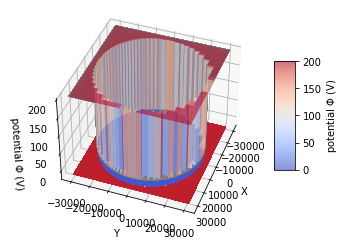

In [166]:
#Nmax = 10000
Nmax = np.shape(xx)[0] 
#print(Nmax)
Max_iter = 100000
omega = 1.99
tol = 1e-1
echarge = 1.60217663*10**(-19)
eps0 = 8.854*10**(-12)
len_trap = 2e-2
thic = 1e-3
r_ebeam = 50 #micrometers - radius of electron beam
r_dtube = 28e3 #micrometers - radius of middle drift tube 
#r_dtube = 10*r_ebeam
t_dtube = 100
px = r_dtube*1.1
py = px 
qV =  4*10**(12)*((100)**(3)) #electron charge density m^-3
tempest = 1.1e7 #temperature estimated in Kelvin assuming thermal equilibrium with electrons 



V_dtube = 200

Nion = 1e12
Zion = 65
#kT = 2e-12
kT = 0.5


def boltzfun(V, q, kT): 
    return np.exp(-q*V/kT)

Phi = np.zeros((Nmax, Nmax), dtype=np.float64)
Phi_old = np.zeros_like(Phi)
rho = np.zeros_like(Phi)
residual = np.zeros_like(Phi)
centerx, centery = 0, 0

xit = np.min(testx)
yit = np.min(testy)

i = 0
j = 0
k = 0

#initialize boundaries
#for k in range(1):
for i in range(Nmax):
    
    for j in range(Nmax):

        xval = xdice[i]
        yval = ydice[j]

        if np.sqrt((xval)**2 + (yval)**2) < r_dtube: 
            Phi[i,j] = 0
        else:
            Phi[i,j] = 200

print(np.shape(Phi))
plot_surf2(Phi, xdice, ydice, elevation=40, azimuth=20);



# plot_surf2(Phi, testx[1], testy[0], elevation=40, azimuth=20)
# plot_surf2(Phi, testx[0], testy[1], elevation=40, azimuth=20)
# plot_surf2(Phi, testx[1], testy[1], elevation=40, azimuth=20)
#plot_contour(Phi)

#fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2, linewidth=0.5, color="gray")
# surf = ax.plot_surface(X, Y, Z, cmap=cmap, alpha=0.6)
# cset = ax.contourf(X, Y, Z, 20, zdir='z', offset=offset+Z.min(), cmap=cmap)

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel(zlabel)
# #ax.set_zlim(offset + Z.min(), Z.max())

# ax.view_init(elev=elevation, azim=azimuth)

#initialize charge distribution 

# for j in range(Nmax):

#     for i in range(Nmax):

#         xval = px*(0.5-(i/Nmax))
#         yval = py*(0.5-(j/Nmax))

#         if np.sqrt((xval)**2 + (yval)**2) >= r_ebeam: 
#             rho[i,j] = 0
#         else: 
#             rho[i,j] = -qV*echarge#*(len_trap)

#plot_contour(rho)
#plot_surf(Phi, elevation=40, azimuth=20)


# for n_iter in tqdm(range(Max_iter)):
#     #print(n_iter)
#     Phi_old[:, :] = Phi
#     Phi = Poisson_Gauss_Seidel_odd_even(Phi, rho, Delta=Delta)
#     residual[:, :] = Phi - Phi_old
#     DeltaPhi = np.linalg.norm(residual)
#     if DeltaPhi < tol:
#         print("SOR converged in {0} iterations to {1}".format(n_iter+1, DeltaPhi))
#         break
#     # SOR
#     Phi[:, :] = Phi_old + omega*residual # = omega*Phi + (1-omega)*Phi_old
# else:
#     print("SOR did NOT converge in {0} iterations, DeltaPhi={1}".format(n_iter+1, DeltaPhi))

    

In [ ]:
plot_surf(Phi, elevation=40, azimuth=20);
plot_contour(Phi)
xp = np.linspace(-px, px, num=Nmax)
plt.figure()
plt.plot(xp, Phi[:,int(Nmax/2)], label='100%')
#plt.plot(xp, Phi[:, int(Nmax/2)], label='30%')
plt.xlim(-5000, 5000)
plt.show()
plt.close()

#f1 = np.exp(-Zion*echarge*Phi/kT)
f1 = np.exp(-Zion*echarge*Phi/4e-16)


plt.figure()
plt.plot(xp, f1[:, int(Nmax/2)])
plt.show()
plot_surf(f1, elevation=0)

In [ ]:
def laplacian2d(f, Delta=1):
    """Finite difference approximation of Del^2 f.
        
    Arguments
    ---------
    f : M x N matrix
    Delta : float
    
    Returns
    -------
    M x N matrix, boundaries set to 0
    """
    
    L = np.zeros_like(f, dtype=np.float64)
    L[1:-1, 1:-1] = f[2:, 1:-1] + f[:-2, 1:-1] + f[1:-1, 2:] + f[1:-1, :-2] - 4*f[1:-1, 1:-1]
    return L/Delta**2

def laplacian2dsimple(f, Delta=1):
    L = np.zeros_like(f, dtype=np.float64)
    for i in range(1, L.shape[0]-1):
        for j in range(1, L.shape[1]-1):
            L[i, j] = f[i+1, j] + f[i-1, j] + f[i, j+1] + f[i, j-1] - 4*f[i, j]            
    return L/Delta**2

In [ ]:
import numpy as np

def test_laplacian2d():
    ftest = np.random.random((200, 200))
    assert np.allclose(laplacian2d(ftest), laplacian2dsimple(ftest))

test_laplacian2d()

In [ ]:
rhox = - laplacian2d(Phi)/(4*np.pi)

In [ ]:
print(rhox.min())
print(rhox.max())

In [ ]:
plot_contour(rhox, zlabel=r"charge density $\rho$");

In [ ]:
plot_surf(rhox, zlabel=r"charge density $\rho$", elevation=20, azimuth=20, offset=-3);